In [1]:
import pandas as pd 
import matplotlib.pyplot as  plt
import numpy as np
from sklearn.preprocessing import LabelEncoder as LB
from sklearn.neighbors import KNeighborsClassifier

# Read datafile with 20 descriptors and label is the last column.
df = pd.read_csv("games_clean.csv") 

In [2]:
df.head()

,Presence,Memory,ReleaseDate,OriginalCost,DiscountedCost,Achievements,Storage,RatingsBreakdown-Recommended,RatingsBreakdown-Meh,RatingsBreakdown-Exceptional,...,Web Publishing,Well-Written,Werewolves,Western,Word Game,World War I,World War II,Wrestling,Zombies,eSports
0,333.0,512.0,2019.0,1.99,0.0,0.0,200.0,2.0,2.0,2.0,...,False,False,False,False,False,False,False,False,False,False
1,363.0,1000.0,2016.0,2.99,0.0,0.0,350.0,1.0,1.0,2.0,...,False,False,False,False,False,False,False,False,False,False
2,102.0,1024.0,2019.0,0.99,0.0,0.0,122.0,1.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False
3,269.0,4000.0,2019.0,0.00,0.0,0.0,300.0,2.0,2.0,1.0,...,False,False,False,False,False,False,False,False,False,False
4,217.0,4000.0,2016.0,11.99,0.0,18.0,4000.0,1.0,1.0,1.0,...,False,False,False,False,False,False,False,False,False,False


In [3]:
LE = LB()
class_names = df['Metacritic'].unique()
df.loc[:, 'Metacritic'] = LE.fit_transform(df['Metacritic'])


In [4]:
labels_num = ['Presence','Memory','ReleaseDate','OriginalCost','DiscountedCost','Achievements','Storage',
                'RatingsBreakdown-Recommended','RatingsBreakdown-Meh','RatingsBreakdown-Exceptional','RatingsBreakdown-Skip',
              'Metacritic']
df = df[labels_num]
df

,Presence,Memory,ReleaseDate,OriginalCost,DiscountedCost,Achievements,Storage,RatingsBreakdown-Recommended,RatingsBreakdown-Meh,RatingsBreakdown-Exceptional,RatingsBreakdown-Skip,Metacritic
0,333.0,512.0,2019.0,1.99,0.0,0.0,200.0,2.0,2.0,2.0,1.0,2
1,363.0,1000.0,2016.0,2.99,0.0,0.0,350.0,1.0,1.0,2.0,1.0,1
2,102.0,1024.0,2019.0,0.99,0.0,0.0,122.0,1.0,1.0,1.0,1.0,3
3,269.0,4000.0,2019.0,0.00,0.0,0.0,300.0,2.0,2.0,1.0,1.0,2
4,217.0,4000.0,2016.0,11.99,0.0,18.0,4000.0,1.0,1.0,1.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2195,161.0,512.0,2014.0,1.99,0.0,0.0,150.0,1.0,1.0,1.0,2.0,0
2196,411.0,4000.0,2020.0,11.99,0.0,0.0,700.0,1.0,1.0,1.0,1.0,2
2197,249.0,4000.0,2016.0,3.99,0.0,20.0,100.0,1.0,3.0,1.0,4.0,3
2198,191.0,1000.0,2019.0,14.99,0.0,0.0,800.0,2.0,1.0,1.0,2.0,2


In [5]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(df,df['Metacritic'].values)

KNeighborsClassifier()

In [6]:
neigh.score(df,df['Metacritic'].values)

0.5104545454545455

In [7]:
a = neigh.kneighbors_graph(X=df, n_neighbors=5, mode='distance')
a.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
# Let's separate Data from labels

X = df.drop(['Metacritic'],axis=1)   # Data
y = df['Metacritic']

print(X.shape)
print(y.shape)

(2200, 11)
(2200,)


## 1- Impact of normalization in KNN

In [9]:
# Notice that only two last features are good to separate data.
# Let's find the 10-fold cross-validation with all columns
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import sklearn.neighbors as nb

cv = StratifiedKFold(n_splits=10) 

cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X,y=y, cv=cv, scoring='accuracy')  
np.mean(cv_scores)

0.2859090909090909

In [10]:
for i in range(11):
    print('std:',X[:,i].std(),'|| min',X[:,i].min(),'|| max',X[:,i].max())

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [ ]:
from sklearn import preprocessing

# One way is to standarize all data mean 0, std 1
scaler = preprocessing.StandardScaler().fit(X)
X2=scaler.transform(X)

for i in range(11):
    print('std:',X2[:,i].std(),'|| min',X2[:,i].min(),'|| max',X2[:,i].max())

In [ ]:
# Let's repeat the 10-fold Cross-validation with new data X2
cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X2,y=y, cv=cv, scoring='accuracy')  
np.mean(cv_scores)


## 2- Effect of irrelevant columns

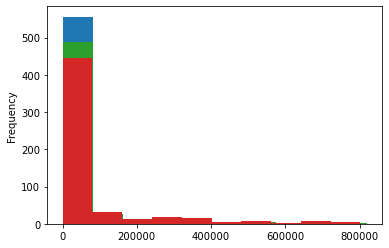

In [11]:
# Let's plot a histogram of values in column Presence grouped by the label
df[df['Metacritic']==0]['Presence'].plot.hist(bins=10)
df[df['Metacritic']==1]['Presence'].plot.hist(bins=10)
df[df['Metacritic']==2]['Presence'].plot.hist(bins=10)
df[df['Metacritic']==3]['Presence'].plot.hist(bins=10)
plt.show()

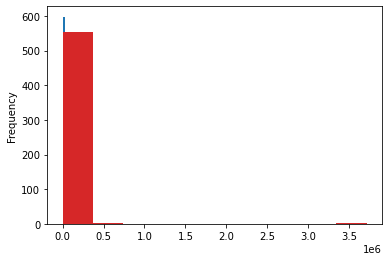

In [12]:
df[df['Metacritic']==0]['Memory'].plot.hist(bins=10)
df[df['Metacritic']==1]['Memory'].plot.hist(bins=10)
df[df['Metacritic']==2]['Memory'].plot.hist(bins=10)
df[df['Metacritic']==3]['Memory'].plot.hist(bins=10)
plt.show()

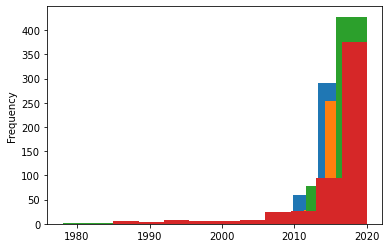

In [13]:
df[df['Metacritic']==0]['ReleaseDate'].plot.hist(bins=10)
df[df['Metacritic']==1]['ReleaseDate'].plot.hist(bins=10)
df[df['Metacritic']==2]['ReleaseDate'].plot.hist(bins=10)
df[df['Metacritic']==3]['ReleaseDate'].plot.hist(bins=10)
plt.show()

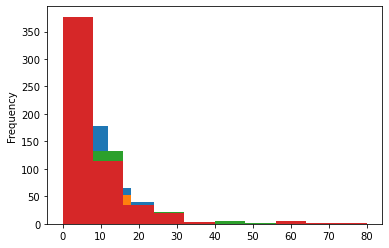

In [14]:
df[df['Metacritic']==0]['OriginalCost'].plot.hist(bins=10)
df[df['Metacritic']==1]['OriginalCost'].plot.hist(bins=10)
df[df['Metacritic']==2]['OriginalCost'].plot.hist(bins=10)
df[df['Metacritic']==3]['OriginalCost'].plot.hist(bins=10)
plt.show()

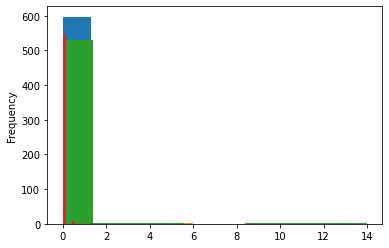

In [15]:
df[df['Metacritic']==0]['DiscountedCost'].plot.hist(bins=10)
df[df['Metacritic']==1]['DiscountedCost'].plot.hist(bins=10)
df[df['Metacritic']==2]['DiscountedCost'].plot.hist(bins=10)
df[df['Metacritic']==3]['DiscountedCost'].plot.hist(bins=10)
plt.show()

In [ ]:
df[df['Metacritic']==0]['Achievements'].plot.hist(bins=10)
df[df['Metacritic']==1]['Achievements'].plot.hist(bins=10)
df[df['Metacritic']==2]['Achievements'].plot.hist(bins=10)
df[df['Metacritic']==3]['Achievements'].plot.hist(bins=10)
plt.show()

In [ ]:
df[df['Metacritic']==0]['Storage'].plot.hist(bins=10)
df[df['Metacritic']==1]['Storage'].plot.hist(bins=10)
df[df['Metacritic']==2]['Storage'].plot.hist(bins=10)
df[df['Metacritic']==3]['Storage'].plot.hist(bins=10)
plt.show()

In [ ]:
df[df['Metacritic']==0]['RatingsBreakdown-Recommended'].plot.hist(bins=10)
df[df['Metacritic']==1]['RatingsBreakdown-Recommended'].plot.hist(bins=10)
df[df['Metacritic']==2]['RatingsBreakdown-Recommended'].plot.hist(bins=10)
df[df['Metacritic']==3]['RatingsBreakdown-Recommended'].plot.hist(bins=10)
plt.show()

In [ ]:
df[df['Metacritic']==0]['RatingsBreakdown-Meh'].plot.hist(bins=10)
df[df['Metacritic']==1]['RatingsBreakdown-Meh'].plot.hist(bins=10)
df[df['Metacritic']==2]['RatingsBreakdown-Meh'].plot.hist(bins=10)
df[df['Metacritic']==3]['RatingsBreakdown-Meh'].plot.hist(bins=10)
plt.show()

In [ ]:
df[df['Metacritic']==0]['RatingsBreakdown-Exceptional'].plot.hist(bins=10)
df[df['Metacritic']==1]['RatingsBreakdown-Exceptional'].plot.hist(bins=10)
df[df['Metacritic']==2]['RatingsBreakdown-Exceptional'].plot.hist(bins=10)
df[df['Metacritic']==3]['RatingsBreakdown-Exceptional'].plot.hist(bins=10)
plt.show()

In [ ]:
df[df['Metacritic']==0]['RatingsBreakdown-Skip'].plot.hist(bins=10)
df[df['Metacritic']==1]['RatingsBreakdown-Skip'].plot.hist(bins=10)
df[df['Metacritic']==2]['RatingsBreakdown-Skip'].plot.hist(bins=10)
df[df['Metacritic']==3]['RatingsBreakdown-Skip'].plot.hist(bins=10)
plt.show()

In [ ]:
df[df['Metacritic']==0]['Metacritic'].plot.hist(bins=10)
df[df['Metacritic']==1]['Metacritic'].plot.hist(bins=10)
df[df['Metacritic']==2]['Metacritic'].plot.hist(bins=10)
df[df['Metacritic']==3]['Metacritic'].plot.hist(bins=10)
plt.show()

In [ ]:
# It seems that feature 1 does not help to separate data according to labels.
# Let's see the same for all the features

#plt.subplots(figsize=(10, 10))
#plt.subplots_adjust(hspace=0.27,wspace=0.5)
#for name in df.columns:
#    plt.subplot(5,4,0+i+1)
#    df[df['Metacritic']==0][name].plot.hist(bins=10)
#    df[df['Metacritic']==1][name].plot.hist(bins=10)
#    df[df['Metacritic']==2][name].plot.hist(bins=10)
#    df[df['Metacritic']==3][name].plot.hist(bins=10)
#plt.show()

In [ ]:
# Let's repeat the 10-fold Cross-validation with new data X2
cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X2,y=y, cv=cv, scoring='accuracy')  
np.mean(cv_scores)


In [ ]:
# Let's find the 10-fold cross-validation with only 2 last columns

cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X2[:,18:],y=y, cv=cv, scoring='accuracy')  
np.mean(cv_scores)

In [ ]:
# Improvement in accuracy
# Unfortunately, we don't know before hand the relevant feature.

# Sklearn to the rescue!

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

# Select k best features following a given measure. Fit that on whole data set and return only relevant columns 
X_new = SelectKBest(mutual_info_classif, k=2).fit_transform(X, y)

# Let's do now the 10-fold cross-validation again
cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X_new,y=y, cv=cv, scoring='accuracy')  
np.mean(cv_scores)

In [ ]:
original = np.zeros(20)
for i in range(20):
    X_new = SelectKBest(mutual_info_classif, k=i+1).fit_transform(X2, y)
    cv_scores = cross_val_score(nb.KNeighborsClassifier(), X=X_new,y=y, cv=cv, scoring='accuracy')  
    original[i]=np.mean(cv_scores)

plt.xticks(np.arange(0, 20, step=1))
plt.plot(range(1,21),original)
plt.show()

## 3- Let's find best parameters

In [ ]:
X_new = SelectKBest(mutual_info_classif, k=2).fit_transform(X, y)

lr = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki), X=X_new, y=y, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,30,2),lr,'b',label='No weighting')

lr = []
for ki in range(1,30,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki,weights='distance'), X=X_new, y=y, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,30,2),lr,'r',label='Weighting')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()

plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = nb.KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(X_new, y)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

## What about PCA for dimensionality reduction?

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X2)
X_pca = pca.transform(X2)

In [ ]:
params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = nb.KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(X_pca, y)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

In [ ]:
# Not very good because does not consider labels in the reduction. Let's try LDA that is similar to PCA
# but takes into account labels

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit(X2, y).transform(X2)

params = {'n_neighbors':list(range(1,30,2)), 'weights':('distance','uniform')}
knc = nb.KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=cv,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(X_lda, y)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)